### Case study 1: (15 points)
#####  your total (60 points) will divided by 4 to get 15 points for this case study

### Predicting the number of likes on Instagram using Regression Techniques

One billion people use Instagram every month, which makes it one of the most popular social networks worldwide. 
Currently, there is an enormous scope market with the potential to be optimized to increase Instagram posts popularity and engagement.

Ref: https://upcommons.upc.edu/bitstream/handle/2117/339937/152579.pdf?sequence=1&isAllowed=y


---
### The Instagram Users Datetime Posts Dataset   
We explore the Instagram Users Datetime Posts dataset, which contains info of 1089 users' posts.

The dataset can estimate the number of likes/likes scores given a post based on different features such as the time and date of the post, type of the post, number of tags, numbers of comments, or how many days the post has been posted. 

--
### Objective:
#### Estimate the number of likes based on number of tags, numbers of comments, or days passed from post.
---

### Steps to do:

    1- import libraries and initialize the plotting environment using matplotlib and/or seaborn  (1 point)

In [1]:
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
import seaborn as sns 
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing


### Set up plotting environment
# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

    2- Loading data into Panda datafram, name it insta_df (1 point)
        * load only the first 2000 rows using the "nrows" parameter

#### Note: you should read just the 2000 examples of the data. 

Otherwise, your execution time for each command will be long since the data has 178922 samples.

In [2]:
# write you code here

##
insta_df = pd.read_csv('Instagram_Data.csv', nrows=2000)

    3- Show the 10 first rows of the data, its shape, and the coulmens names: (3 points)

In [3]:
# 10 first rows of the data
insta_df.head(10)

,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute
0,1,506,657,0.74,Image,3,11,2019-05-12 21:18:39,2019,5,12,21,18
1,1,385,657,0.57,Image,0,1,2019-05-12 14:25:55,2019,5,12,14,25
2,1,373,666,0.55,Images,4,15,2019-05-03 15:18:37,2019,5,3,15,18
3,1,312,667,0.46,Images,4,1,2019-05-02 16:40:38,2019,5,2,16,40
4,1,513,674,0.75,Images,5,0,2019-04-25 16:51:58,2019,4,25,16,51
5,1,539,677,0.79,Images,3,3,2019-04-22 20:03:00,2019,4,22,20,3
6,1,330,677,0.49,Image,0,3,2019-04-22 15:07:34,2019,4,22,15,7
7,1,472,681,0.69,Images,3,7,2019-04-18 14:44:36,2019,4,18,14,44
8,1,272,682,0.40,Image,0,0,2019-04-17 15:42:56,2019,4,17,15,42
9,1,304,688,0.45,Images,3,0,2019-04-11 15:00:05,2019,4,11,15,0


In [4]:
# insta_df shape
insta_df.shape

(2000, 13)

In [5]:
# insta_df column names
insta_df.columns

Index(['User uuid', 'Likes', 'Days passed from post', 'Likes Score', 'Type',
       'Numer of Tags', 'Numer of Comments', 'Date Posted', 'Year', 'Month',
       'Day', 'Hour', 'Minute'],
      dtype='object')

    4- Check the number of samples in the dataset (1 point)

In [6]:
# insta_df row numbers: 
len(insta_df)

2000

    5- Check the data type of each column ( 1 point)

In [7]:
# Print datatypes
insta_df.dtypes


User uuid                  int64
Likes                      int64
Days passed from post      int64
Likes Score              float64
Type                      object
Numer of Tags              int64
Numer of Comments          int64
Date Posted               object
Year                       int64
Month                      int64
Day                        int64
Hour                       int64
Minute                     int64
dtype: object

    6- Remove columns from the dataframe:

        a. Remove user id from the insta_df as there is no useful information from this column. (1 point)

        b. Remove the Likes Score since it is calculated from the number of likes. (1 point)

        c. Remove the date and time columns from the data frame since our goal is not to consider the posted date and time related to the number of likes (2 points) 

In [8]:
# Remove User uuid
insta_df=insta_df.drop(columns=['User uuid'])

# Remove User Likes Score
insta_df=insta_df.drop(columns=['Likes Score'])

# Remove all columns between column index 1 to 3
cols = insta_df.columns[5:]
insta_df=insta_df.drop(columns =cols)
# show the insta_df after you remove the required columns
insta_df

,Likes,Days passed from post,Type,Numer of Tags,Numer of Comments
0,506,657,Image,3,11
1,385,657,Image,0,1
2,373,666,Images,4,15
3,312,667,Images,4,1
4,513,674,Images,5,0
...,...,...,...,...,...
1995,58,186,Image,0,84
1996,81,193,Video,4,5
1997,251,194,Image,4,13
1998,962,197,Images,0,38


    7- Check how many unique values are on the "Type" column. ( 1 point)
        * you can use the unique() function if you wish

In [9]:
# write you code here
insta_df['Type'].unique()

array(['Image', 'Images', 'Video'], dtype=object)

    8- Use label encoder to change the "Type" coulmn values to numeric values (2 point)

In [10]:
# Encode "Type"
from sklearn import preprocessing

insta_df['Type']=preprocessing.LabelEncoder().fit_transform(insta_df['Type'])
##
insta_df

,Likes,Days passed from post,Type,Numer of Tags,Numer of Comments
0,506,657,0,3,11
1,385,657,0,0,1
2,373,666,1,4,15
3,312,667,1,4,1
4,513,674,1,5,0
...,...,...,...,...,...
1995,58,186,0,0,84
1996,81,193,2,4,5
1997,251,194,0,4,13
1998,962,197,1,0,38


    9- Check how many NaN values are in each column: 

        a. How many NaNs as total ( 1 point)

        b. How many NaNs as a percentage of overall data ( 1 point)

In [11]:
# a. How many NaNs as total
insta_df.isnull().sum()

Likes                    0
Days passed from post    0
Type                     0
Numer of Tags            0
Numer of Comments        0
dtype: int64

In [12]:
# b. How many NaNs as a percentage of overall data
insta_df.isnull().sum() * 100 / len(insta_df)

Likes                    0.0
Days passed from post    0.0
Type                     0.0
Numer of Tags            0.0
Numer of Comments        0.0
dtype: float64

    10- Divide the data into features (X), and target (y) --> your target is Likes  (2 points)

In [13]:
# your featuers X:
X = insta_df.loc[:, insta_df.columns != 'Likes']
##
X

,Days passed from post,Type,Numer of Tags,Numer of Comments
0,657,0,3,11
1,657,0,0,1
2,666,1,4,15
3,667,1,4,1
4,674,1,5,0
...,...,...,...,...
1995,186,0,0,84
1996,193,2,4,5
1997,194,0,4,13
1998,197,1,0,38


In [14]:
# your target y:
y=insta_df.loc[:,'Likes']
##
y

0       506
1       385
2       373
3       312
4       513
       ... 
1995     58
1996     81
1997    251
1998    962
1999    179
Name: Likes, Length: 2000, dtype: int64

    11- Checking for Multicollinearity for features (X) using a correlation matrix. (1 points)

In [15]:
# write your code here:
corr = X.corr().round(2)
corr.style.background_gradient(cmap='coolwarm')
#sns.set(rc={'figure.figsize':(4,4)})
#sns.heatmap(data=corr, annot=True)


,Days passed from post,Type,Numer of Tags,Numer of Comments
Days passed from post,1.000000,-0.150000,-0.170000,-0.120000
Type,-0.150000,1.000000,-0.010000,0.000000
Numer of Tags,-0.170000,-0.010000,1.000000,0.050000
Numer of Comments,-0.120000,0.000000,0.050000,1.000000


    12- From the above pairplot, what did you observe? ( 1 points)

##### Write your answer here:

-- From the above pairplot, I observe that.
--Number of Tags <-> Number Of Comments have good corelation comared to other features (0.05)




    13- Use a scatter plot to check each feature's relationship with the target variable, Likes. (1 points)

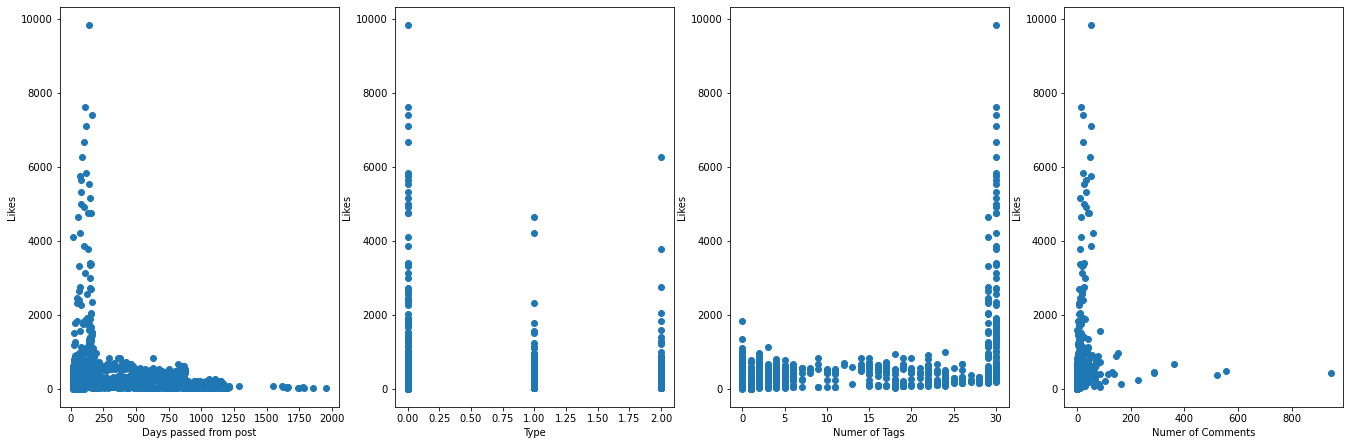

In [16]:
# write your code here
plt.figure(figsize = ( 35 , 25 )) 
features = list (X) 
for i, col in enumerate (features): 
    plt.subplot(3 , 6 ,i +1 ) 
    x = insta_df[col] 
    y = y 
    plt.scatter(x, y, marker = 'o' )
    plt.xlabel(col) 
    plt.ylabel( 'Likes' )

    14- From the above pairplot, what did you observe? ( 1 points)


##### Write your answer here:

-- I observe the relation between days passed from the post and likes are in a negative correlation as it tends more towardsfrom high to low data points. The realtion between likes and Types have only catgorigcal data points, such as type of instagram posts. 
The number of Tags and likes relation have an uneven distribution data points. Such as from 2000 likes to 10000 likes only when nearing more than 28 Tags.

The scatter plot of number of comments and Likes have more constant data points, which tends to more within 0 and 200 comments, only few data points move away from 200 comments. 

Overall due to uneven distrubtion of data inference this scatter plot is difficult and it is clearly observed that the data points not distributed uniformly.


--

    15- Display the target distribution using histogram (1 points)

<AxesSubplot:>

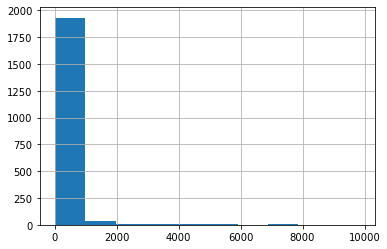

In [17]:
# write your code here:
y.hist()

    16- From the above histogram, what did you observe about the target distribution? ( 1 point)
    

##### Write your answer here:

-- From the above histogram , I observe that the target is unevenly distributed. Where Most of the data points have likes within 1000, only few data points is more than 1000.


--

    17-Transfer the target y into log to have the normal distributions: (1 point)

<AxesSubplot:>

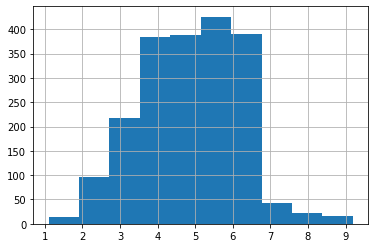

In [18]:
#transfer the target y into log
y=np.log(y)
y
y.hist() #Verifying how it is distributed now

### Preparing the machine learning pipeline


    18- Splitting the data into training 80% and testing sets 20%. (1 point)
        * print the sizes of our training and test set to verify if the splitting has occurred properly. (1 point)

In [19]:
# Splitting the data:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# print the sizes of our training and test set:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 4)
(400, 4)
(1600,)
(400,)


    19- Use Pipeline class with the cross-validation to fit the scaling on only the training dataset and evaluate the linear regression model, (Use k=10 and MSE as your metric)( 2 point)

        * 'neg_mean_squared_error' returns the negated value of the MSE; make sure to take the absolute to get the positive one (1 point)
        * print the average MSE (1 point)

In [20]:
# writer your code here:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score


from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(StandardScaler(), LinearRegression())
scores_pipe_2 = cross_val_score(pipeline, x_train, y_train,cv=10, scoring='neg_mean_squared_error') # this return the negated value of the MSE, make sure to multiply it by -1 to get the positive one
print("Average 10-Fold CV MSE Score: {}".format(-1*(np.mean(scores_pipe_2)) ))

Average 10-Fold CV MSE Score: 1.269653249692227


    20- Hyperparameters tuning using GridSearchCV (Use k=10 and MSE as your metric):

        A. Ridge regression:
            * Find out the best value of α’s (-3, -2, 1, 2, 3) for Ridge regression (1 point)
            * print the best score and the best alpha value (1 point)

In [21]:
# write your code here:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge(normalize=True)
param_grid = {'alpha': np.logspace(-3,-2,1,2,3)}
grid = GridSearchCV(ridge, param_grid, scoring='neg_mean_absolute_error', cv=10, return_train_score=True)
grid.fit(x_train,y_train)
best_score = float(format(grid.best_score_, '.4f'))
print('Best CV score: {:.4f}'.format(grid.best_score_))
print('Best parameter :',grid.best_params_)

Best CV score: -0.9283
Best parameter : {'alpha': 0.037037037037037035}


        B. Lasso: 
            * Find out the best value of α’s (-3, -2, 1, 2, 3) for Lasso method. (1 point)
            * print the best score and the best alpha value (1 point)

In [22]:
# write your code here:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso(max_iter=10000,normalize=True)
param_grid = {'alpha': np.logspace(-3,-2,1,2,3)}
grid = GridSearchCV(lasso, param_grid, scoring='neg_mean_absolute_error', cv=10, return_train_score=True)
grid.fit(x_train,y_train)
best_score = float(format(grid.best_score_, '.4f'))
print('Best CV score: {:.4f}'.format(grid.best_score_))
print('Best parameter :',grid.best_params_)

Best CV score: -1.0902
Best parameter : {'alpha': 0.037037037037037035}


#### Robust regression

      21- Use Pipeline class with the cross-validation with k= 10 to fit the scaling on only the training dataset, and evaluate the models using 'neg_mean_squared_error':
    
            A.  The Huber regression model module ( 1 points)
                * print the absolute average MSE (1 point)

In [23]:
# write your code here:
from sklearn.linear_model import HuberRegressor, RANSACRegressor
# write your cod# evaluate model
pipeline_huber = make_pipeline(StandardScaler(), HuberRegressor())
scores_huber = cross_val_score(pipeline_huber, x_train, y_train, scoring='neg_mean_absolute_error', cv=10)
#force scores to be positive e here:
print("Average 10-Fold CV MSE Score for Huber regression: {}".format(absolute((np.mean(scores_huber)) )))


Average 10-Fold CV MSE Score for Huber regression: 0.9112238972166358


        B.  The RANSAC regression model modle ( 1 point)
            * print the absolute avarge MSE (1 point)

In [24]:
# evaluate model
pipeline_ransac = make_pipeline(StandardScaler(),RANSACRegressor())
scores_RANSAC = cross_val_score(pipeline_ransac,x_train, y_train, scoring='neg_mean_absolute_error', cv=10)
#force scores to be positive
print("Average 10-Fold CV MSE Score for RANSAC regression: {}".format(absolute((np.mean(scores_RANSAC )) )))

Average 10-Fold CV MSE Score for RANSAC regression: 1.098813276695524


    22- From the above models you validated using cross-validation, which model performed very well on average? (1 point)         

##### Write your answer here:

-- Huber performed well beacuse it has lowest mean squared error (MSE) of 


--

    23- Use the Best model to build/fit your final model using your train-data.(5 points)

In [25]:
# write your code here:
huber = HuberRegressor()
model = huber.fit(x_train, y_train)


    24- Predict the number of likes for test data and compute the MSE (5 points)

In [1]:
# write your code here:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(x_test)
print('Mean Squared Error(MSE):%.2f'%mean_squared_error(y_test,y_pred))

NameError: name 'model' is not defined

    25- Write a conclusion about building a good model for predicting the number of likes using Instagram Users Datetime Posts. (10 points)

       your conclusion should include: 
        * why a specific model performs better than other models and why a regression algorithm works well with this dataset.
        
        Each model approached with their own method,
        * Did Robust regression algorithms outperformance the linear regression baseline or linear regression after applying Shrinkage Methods? Why?

    Write a summary of what you understand about linear regression and cross-validation. 

-- 

-- 

---
## All set

Please make sure you execute each cell before you submit your file; this is important becuse if your code didn't work on our machine for an unknown reason, it would be better to see the result rather than losing some points or wasting time to contact you to fix this issue. 

What to submit:

* Your Jupyter Notebook file.
* Name your file as firstname_lastname_CS_1 . 
---